<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr9_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes

In [11]:
#stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.0)
np.random.seed(42)

In [12]:
#wczytanie danych

from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Podsumowanie GaussianNB
Prawdopodobieństwa klas (priors):
[0.33333333 0.33333333 0.33333333]

Średnie cech w klasach (theta_):
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa               4.988571          3.425714           1.485714   
versicolor           5.948571          2.731429           4.237143   
virginica            6.682857          3.008571           5.631429   

            petal width (cm)  
setosa              0.240000  
versicolor          1.308571  
virginica           2.068571  

Wariancje cech w klasach (sigma_):
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa               0.103298          0.173910           0.022939   
versicolor           0.240784          0.085584           0.211478   
virginica            0.424849          0.117355           0.322727   

            petal width (cm)  
setosa              0.009257  
versicolor          0.035641  
virginica           0.063869  

=== Ewaluacja na zbiorze t

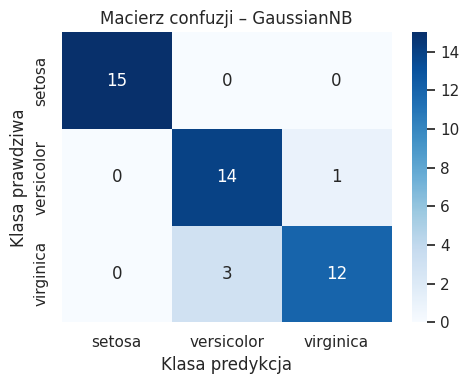

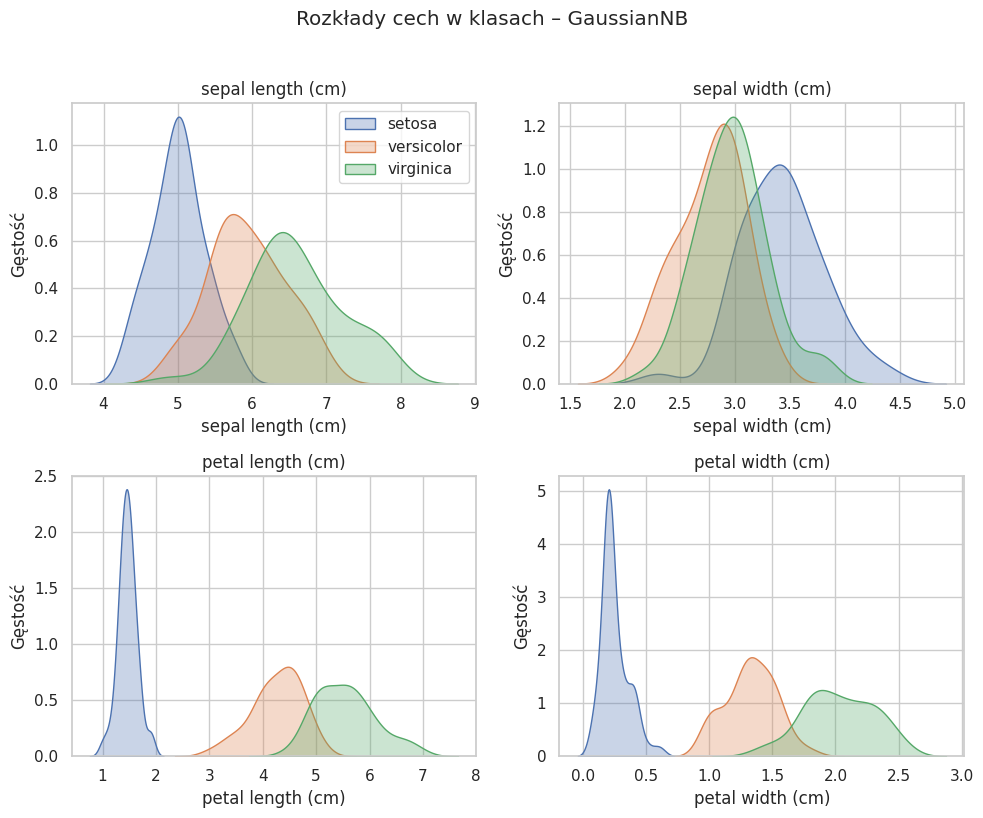

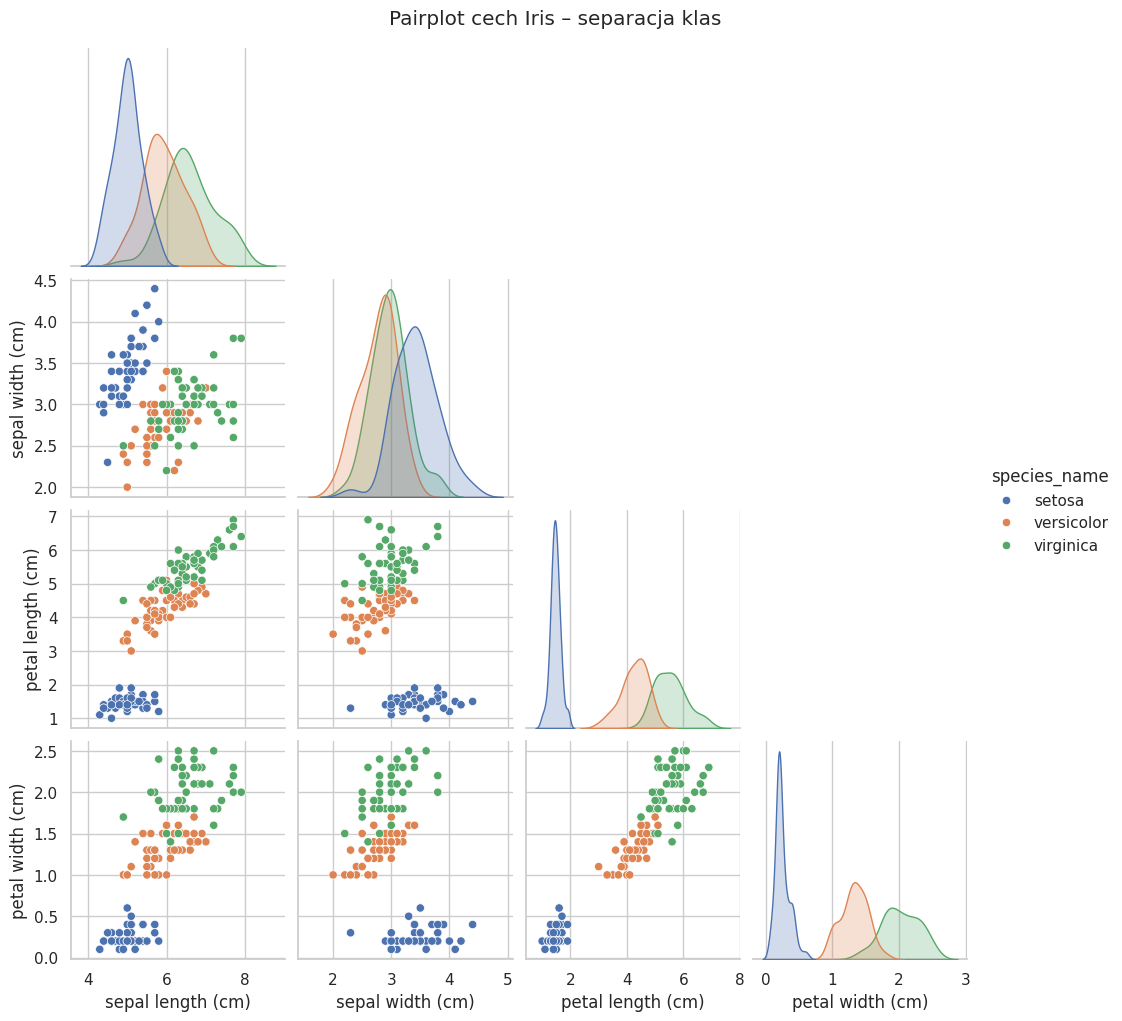


===zadany kwiat ===
Predykcja klasa (indeks): 2
Nazwa klasy: virginica


In [17]:
#Naivny Bayess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")

# wczytaj dane i df
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
df.head()

#Dane
X = df.iloc[:, :-1].values          # 4 kolumny cech
y = df['target'].astype(int).values # 0,1,2

#zbiór tr/te
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#byess
nb = GaussianNB()
nb.fit(X_train, y_train)

#podsuma
print("Podsumowanie GaussianNB")
print("Prawdopodobieństwa klas (priors):")
print(nb.class_prior_)

print("\nŚrednie cech w klasach (theta_):")
print(pd.DataFrame(nb.theta_, columns=feature_names, index=target_names))

print("\nWariancje cech w klasach (sigma_):")
print(pd.DataFrame(nb.var_, columns=feature_names, index=target_names)) #

# testowe
y_pred = nb.predict(X_test)
print("\n=== Ewaluacja na zbiorze testowym ===")
print("Accuracy test:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=target_names))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Klasa predykcja')
plt.ylabel('Klasa prawdziwa')
plt.title('Macierz confuzji – GaussianNB')
plt.tight_layout()
plt.show()

#rozkłady cech
plt.figure(figsize=(10, 8))
for i, feat in enumerate(feature_names, start=1):
    plt.subplot(2, 2, i)
    for cls in np.unique(y):
        sns.kdeplot(
            X[y == cls, i-1],
            label=f'{target_names[cls]}',
            fill=True,
            alpha=0.3
        )
    plt.title(feat)
    plt.xlabel(feat)
    plt.ylabel('Gęstość')
    if i == 1:
        plt.legend()

plt.suptitle('Rozkłady cech w klasach – GaussianNB', y=1.02)
plt.tight_layout()
plt.show()

# pairplot
df_plot = df.copy()
df_plot['species_name'] = df_plot['target'].astype(int).map(
    {i: name for i, name in enumerate(target_names)}
)

sns.pairplot(
    df_plot,
    vars=feature_names,
    hue='species_name',
    corner=True,
    diag_kind='kde'
)
plt.suptitle('Pairplot cech Iris – separacja klas', y=1.02)
plt.show()
#
# KALSYFIKACJA
new_sample = np.array([[2.5, 4.1, 3.9, 5.9]])  # [Sepal.Length, Sepal.Width, Petal.Length, Petal.Width]

new_pred = nb.predict(new_sample)
print("\n===zadany kwiat ===")
print("Predykcja klasa (indeks):", new_pred[0])
print("Nazwa klasy:", target_names[new_pred][0])
